## news_mood.py 
----
The below code is meant to provide a cursory look at the world mood according to the Twitter profiles of news agencies. In essence, the script allows one to quickly perform a sentiment analysis on the most recent tweets of any given Twitter accounts and plot the results. Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, VADER Sentiment Analysis, and Seaborn.

In [11]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

# API keys
import api_keys

# Initialize Sentiment Analyzer 
# from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret

In [12]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

## Grab Tweets

In [13]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [14]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,Crowds of President Trump supporters are gathe...,Sat Nov 14 16:33:21 +0000 2020,0.4404,0.195,0.805,0.00
1,Fox News,As violent crime surges across the nation of 1...,Sat Nov 14 15:58:46 +0000 2020,-0.8126,0.000,0.720,0.28
2,Fox News,The U.S. Army announced the deaths of five sol...,Sat Nov 14 14:05:27 +0000 2020,0.4588,0.167,0.833,0.00
3,Fox News,Acting Defense Secretary Christopher Miller sh...,Sat Nov 14 12:29:26 +0000 2020,0.4404,0.262,0.738,0.00
4,Fox News,Miami Republicans flipped seats in two South F...,Sat Nov 14 11:55:12 +0000 2020,0.0000,0.000,1.000,0.00


In [15]:
# Count the total number of tweets
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [16]:
# Obtain the source names for reference
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [17]:
# Convert dates (currently strings) into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,Sunny Hostin sides with AOC's blacklist: Trump...,2020-11-11 01:49:55+00:00,0.4215,0.177,0.823,0.000
1,Fox News,"RT @FoxBusiness: Amazon’s Ring recalls 350,000...",2020-11-11 01:50:33+00:00,0.0000,0.000,1.000,0.000
2,Fox News,RT @FoxBusiness: Shaq shaves $3 million off as...,2020-11-11 01:50:48+00:00,0.6124,0.182,0.818,0.000
3,Fox News,"GOP-bashing, softball questions take center st...",2020-11-11 02:20:55+00:00,0.0000,0.000,1.000,0.000
4,Fox News,James Carville says 'woke' people need to take...,2020-11-11 10:48:18+00:00,-0.4019,0.000,0.828,0.172


## Sentiment Scatter Plot

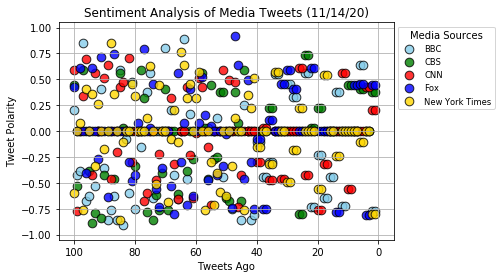

In [18]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

## Overall Sentiment Bar Graph

In [22]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
tweet_df_polarity = pd.DataFrame(tweet_df_polarity)

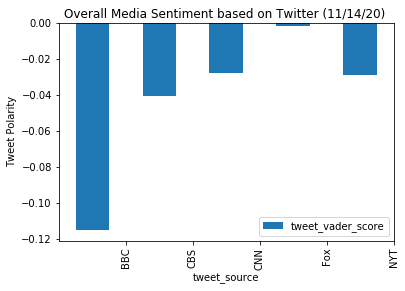

In [24]:
# Generate bars for each news source

# Orient widths, add labels, tick marks, etc. 

# Save Figure

# Show Figure
